# This part 2 of 3 completely TBD very soon

**Other notebooks:** <br>
[Part 1: Data mining and munging](tdp_1_3_data_mining_and_cleaning.ipynb)<br>
[Part 3: Data modeling](tdp_3_3_data_modeling.ipynb)

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns; sns.set()

### Data loading

In [18]:
# Main data for modeling
biker_class = pd.read_csv('preprocessed/biker_class.csv', index_col=0)

# Additional parts for statistics
biker_stats = pd.read_csv('preprocessed/biker_stats.csv', index_col=0)
biker_by_stage = pd.read_csv('preprocessed/biker_by_stage.csv', index_col=0)
stage_results = pd.read_csv('preprocessed/stages.csv', index_col=False)
stage_class = pd.read_csv('preprocessed/stages_summary.csv', index_col=False)

# Statistics

In [27]:
biker_class.shape

(5256, 92)

In [26]:
biker_class[biker_class.time_in_s < 999999].shape

(4975, 92)

In [28]:
# Number of bikers that DNF or DNS in any stage
biker_class.shape[0] - biker_class[biker_class.time_in_s < 999999].shape[0]

281

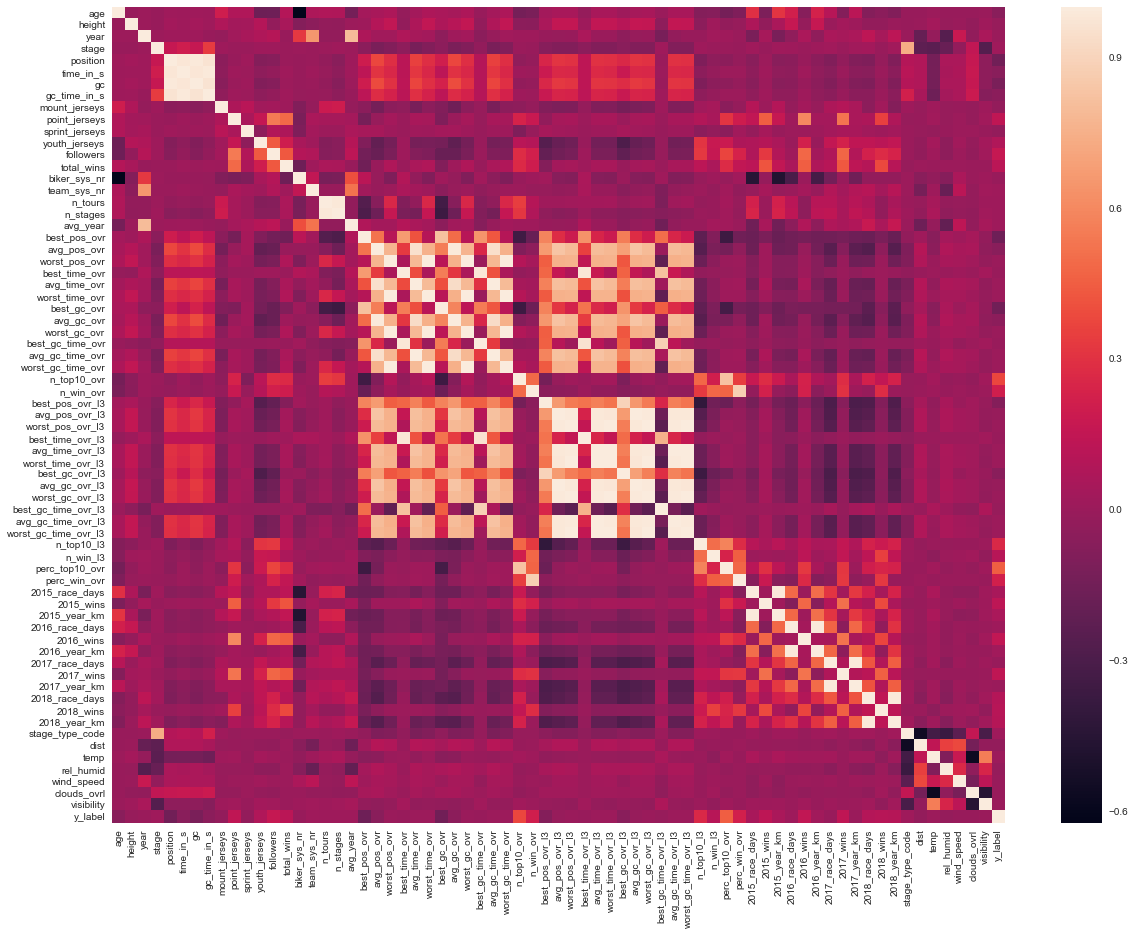

In [36]:
# plot heatmap

fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(biker_class.corr(), ax=ax)

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(90);

In [39]:
# Dataframe with no DNFs and DNSs
biker_class[biker_class.time_in_s < 999999].describe().round(2)

,age,height,year,stage,position,time_in_s,gc,gc_time_in_s,mount_jerseys,point_jerseys,...,2018_wins,2018_year_km,stage_type_code,dist,temp,rel_humid,wind_speed,clouds_ovrl,visibility,y_label
count,4975.00,2993.00,4975.00,4975.00,4975.00,4975.00,4975.00,4975.00,4975.00,4975.00,...,4465.00,4465.00,4975.00,4975.00,4975.00,4975.00,4975.00,4975.00,4975.00,4975.00
mean,28.20,1.80,2015.97,3.69,75.93,14469.70,75.93,53322.67,0.65,0.98,...,0.66,8192.30,1.93,164.29,25.24,38.57,2.54,4.53,7.47,0.07
std,4.25,0.06,1.44,1.93,45.93,5189.35,45.93,30607.92,1.36,2.42,...,1.55,2971.69,1.33,53.64,4.49,26.40,1.27,2.20,1.25,0.25
min,20.00,1.65,2014.00,1.00,1.00,1725.00,1.00,9783.00,0.00,0.00,...,0.00,0.00,1.00,25.00,12.50,0.00,0.00,0.00,4.00,0.00
25%,25.00,1.76,2015.00,2.00,37.00,11399.00,37.00,22603.50,0.00,0.00,...,0.00,6357.00,1.00,135.00,22.10,24.00,2.00,2.00,7.00,0.00
50%,28.00,1.80,2016.00,4.00,74.00,13358.00,74.00,53492.00,0.00,0.00,...,0.00,8724.40,1.00,161.00,25.50,38.00,3.00,5.00,8.00,0.00
75%,31.00,1.84,2017.00,5.00,111.50,19003.00,111.50,77169.00,1.00,1.00,...,1.00,10523.80,2.00,218.00,29.50,61.00,4.00,6.00,8.00,0.00
max,44.00,1.95,2018.00,7.00,199.00,24240.00,199.00,115326.00,11.00,36.00,...,17.00,13428.90,6.00,240.00,33.20,90.00,5.00,8.00,9.00,1.00


In [45]:
biker_class.describe(include='object')

,name,nation,team,2015_div,2015_fc_rank,2015_team,2015_uci_rank,2016_div,2016_fc_rank,2016_team,...,2017_team,2017_uci_rank,2018_div,2018_fc_rank,2018_team,2018_uci_rank,date,stage_type,finish,wind_dir
count,5255,5255,5255,4870,5085,5085,5085,5048,5160,5160,...,4953,4953,4589,4714,4714,4714,5256,5256,5256,4965
unique,513,44,69,3,373,95,79,3,370,78,...,77,181,3,332,74,156,35,4,18,15
top,D.Villella,Italy,Team Sky,PRT,-,Team Katusha,-,PRT,-,Team Katusha,...,Astana Pro Team,-,PRT,-,Astana Pro Team,-,2016-07-12,flat,Katowice,NW
freq,34,875,250,3332,73,270,3401,3716,168,265,...,270,1838,3219,282,316,2000,200,2572,818,814


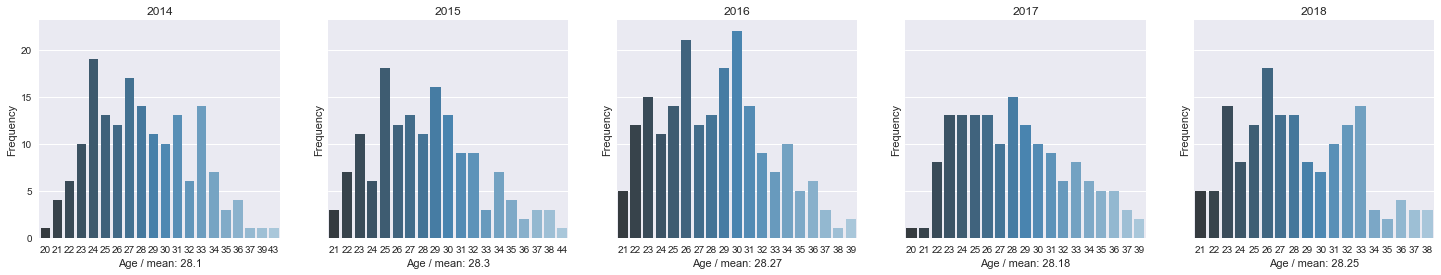

In [51]:
# Age distribution through tour years
i = 0
fig, ax = plt.subplots(1,5, figsize=(25,4), sharey=True)
for year in range(2014,2019):
    sns.countplot(x="age", data=stage_results[stage_results.year == year][['name','age']].drop_duplicates(),
                  palette="Blues_d", orient='h', ax=ax[i])
    ax[i].set_title(year)
    ax[i].set_xlabel('Age / mean: %s' % round(stage_results[stage_results.year == year][['name','age']]\
                                              .drop_duplicates()['age'].mean(), 2))
    ax[i].set_ylabel('Frequency')
    i += 1

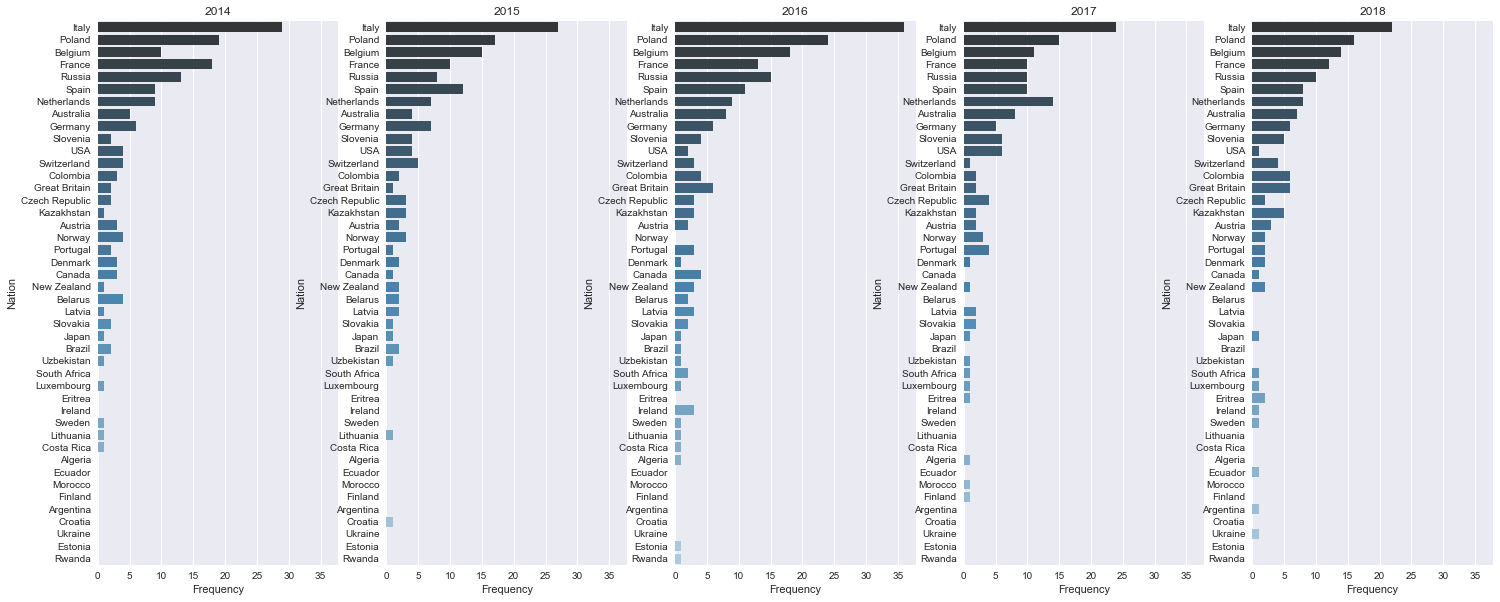

In [52]:
# Nationality distribution through years
i = 0
fig, ax = plt.subplots(1,5, figsize=(25,10), sharey=False, sharex=True)
for year in range(2014,2019):
    ax[i] = sns.countplot(y="nation", data=biker_class[biker_class.year == year][['name','nation']].drop_duplicates(),
                  order=biker_class['nation'].value_counts().index,
                  palette="Blues_d", orient='h', ax=ax[i])
    ax[i].set_title(year)
    ax[i].set_xlabel('Frequency')
    ax[i].set_ylabel('Nation')
    i += 1

In [ ]:
# TDB